<a href="https://colab.research.google.com/github/Kiranmai-Guddanti/DAI101_Assignment-1/blob/main/DA1_101_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Dataset Analysis**
The Titanic dataset contains information about passengers aboard the Titanic when it sank in 1912. It is commonly used for data analysis and machine learning tasks.

**Attributes in the Dataset:**

**sn (Serial Number)** – A unique identifier for each passenger.

**pclass (Passenger Class)** – Ticket class:

1 = First Class

2 = Second Class

3 = Third Class

**survived  –** Indicates whether the passenger survived.
(1 = Survived,
0 = Not Survived)

**name –**The full name of the passenger.

**gender –** The passenger’s gender, either male or female.

**age –**The age of the passenger in years.

**family –**The number of siblings or spouses aboard the ship.

**fare** – The fare amount paid for the ticket.

**Embarked** – The port from which the passenger boarded the ship, with options being Cherbourg (C), Queenstown (Q), or Southampton (S).

**date** – A date column that appears to be a placeholder (does not relate to actual Titanic data).

**Key Points About the Dataset:**

1. The Survived column is the main target variable for
survival prediction.

2. Pclass and Fare provide insight into the socio-economic status of passengers, which may have influenced survival chances.

3. SibSp and Parch help analyze the impact of family presence on survival rates.

4. The Age and Cabin columns contain missing values that need to be handled before analysis.

5. The Embarked column helps understand the boarding locations of passengers.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization style
sns.set_style("darkgrid")

In [ ]:
df = pd.read_csv("Titanic.csv")

# Display basic information
df.head()

,1,2,3,4,5,6,7,8,9,10
0,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
3,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
4,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       1302 non-null   object
 1   2       1302 non-null   object
 2   3       1302 non-null   object
 3   4       1301 non-null   object
 4   5       1301 non-null   object
 5   6       1045 non-null   object
 6   7       1300 non-null   object
 7   8       1300 non-null   object
 8   9       1296 non-null   object
 9   10      1302 non-null   object
dtypes: object(10)
memory usage: 101.8+ KB


In [ ]:
# Rename columns based on inferred meaning from the first row
df.columns = ["sn", "pclass", "survived", "name", "gender", "age", "family", "fare", "embarked", "date"]

# Drop the first row, which appears to be an incorrect header
df = df.iloc[1:].reset_index(drop=True)

# Display updated structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sn        1301 non-null   object
 1   pclass    1301 non-null   object
 2   survived  1301 non-null   object
 3   name      1301 non-null   object
 4   gender    1300 non-null   object
 5   age       1044 non-null   object
 6   family    1299 non-null   object
 7   fare      1299 non-null   object
 8   embarked  1295 non-null   object
 9   date      1301 non-null   object
dtypes: object(10)
memory usage: 101.8+ KB


# **Data Cleaning**
# **Handling Missing Values**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Convert "age" and "fare" to numeric (forcing errors to NaN)
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["fare"] = pd.to_numeric(df["fare"], errors="coerce")

# Use assign() to avoid chained assignment warning
df = df.assign(
    age=df["age"].fillna(df["age"].median()),
    family=df["family"].fillna(df["family"].mode()[0]),
    fare=df["fare"].fillna(df["fare"].median()),
    embarked=df["embarked"].fillna(df["embarked"].mode()[0])
)

# Drop rows where gender is missing (since it's only 1 missing value)
df = df.dropna(subset=["gender"])

# Verify missing values are handled
print("Missing Values After Handling:\n", df.isnull().sum())



Missing Values:
 sn            0
pclass        0
survived      0
name          0
gender        1
age         257
family        2
fare          2
embarked      6
date          0
dtype: int64
Missing Values After Handling:
 sn          0
pclass      0
survived    0
name        0
gender      0
age         0
family      0
fare        0
embarked    0
date        0
dtype: int64


In [ ]:
df.head()

,sn,pclass,survived,name,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42.0,0,7.55,S,01-Jan-90
1,1,3,0,Mr. Anthony,male,42.0,0,7.55,S,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,28.0,2,20.25,S,02-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35.0,2,20.25,S,04-Jan-90
5,5,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,7.65,S,05-Jan-90


# **Handling Duplicates**

In [ ]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Duplicate Records: {duplicate_count}")

# Remove duplicate records
df = df.drop_duplicates().reset_index(drop=True)


Duplicate Records: 1


In [ ]:
# Convert numerical columns to appropriate types, handling errors gracefully
numeric_columns = ["pclass", "survived", "age", "family", "fare"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN

# Display updated structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sn        1299 non-null   object 
 1   pclass    1299 non-null   int64  
 2   survived  1299 non-null   int64  
 3   name      1299 non-null   object 
 4   gender    1299 non-null   object 
 5   age       1299 non-null   float64
 6   family    1299 non-null   int64  
 7   fare      1299 non-null   float64
 8   embarked  1299 non-null   object 
 9   date      1299 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 101.6+ KB


# **Handling Outliers Using the IQR Method**

In [ ]:
def replace_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower limit
    upper_bound = Q3 + 1.5 * IQR  # Upper limit

    # Replace outliers with the median of the column
    median = data[column].median()
    data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return data

# Apply IQR method to replace outliers with median in numerical columns
numerical_cols = ["age", "fare", "family"]
for col in numerical_cols:
    df = replace_outliers_with_median(df, col)

print("Dataset shape after replacing outliers with median:", df.shape)


Dataset shape after replacing outliers with median: (1299, 10)


# **Exploratory Data Analysis**
# **Univariate Analysis**
# **1.Summary Statistics**

In [ ]:
df.describe()

,pclass,survived,age,family,fare
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,2.289453,0.384911,28.518091,0.423403,17.551447
std,0.838759,0.486762,9.593142,0.698407,12.972156
min,1.000000,0.000000,3.000000,0.000000,0.000000
25%,2.000000,0.000000,23.750000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,14.454200
75%,3.000000,1.000000,32.000000,1.000000,24.075000
max,3.000000,1.000000,54.000000,2.000000,65.000000


# **2.Skewness and Kurtosis (Measure Distribution Shape)**

In [ ]:
# Select only numeric columns before calculating skewness and kurtosis
numeric_df = df.select_dtypes(include=["number"])

# Skewness (measures asymmetry)
print("Skewness:\n", numeric_df.skew())
print("\n")
# Kurtosis (measures tail heaviness)
print("Kurtosis:\n", numeric_df.kurtosis())


Skewness:
 pclass     -0.586415
survived    0.473603
age         0.257281
family      1.348122
fare        1.673817
dtype: float64


Kurtosis:
 pclass     -1.328878
survived   -1.778440
age         0.647888
family      0.347713
fare        2.444686
dtype: float64


# **3.Additional Visualizations**
**Histogram for Age**

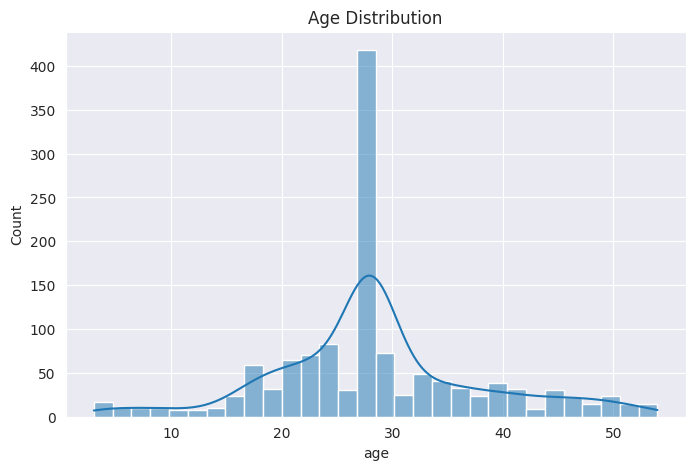

In [ ]:
# Histogram for Age
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

**Frequency distribution of categorical variables**

In [ ]:
# Frequency distribution of categorical variables
print(df["pclass"].value_counts())
print("\n")
print(df["survived"].value_counts())
print("\n")
print(df["gender"].value_counts())
print("\n")
print(df["embarked"].value_counts())

pclass
3    699
1    323
2    277
Name: count, dtype: int64


survived
0    799
1    500
Name: count, dtype: int64


gender
male      834
female    465
Name: count, dtype: int64


embarked
S    909
C    267
Q    123
Name: count, dtype: int64


**Distribution of Passenger Class**

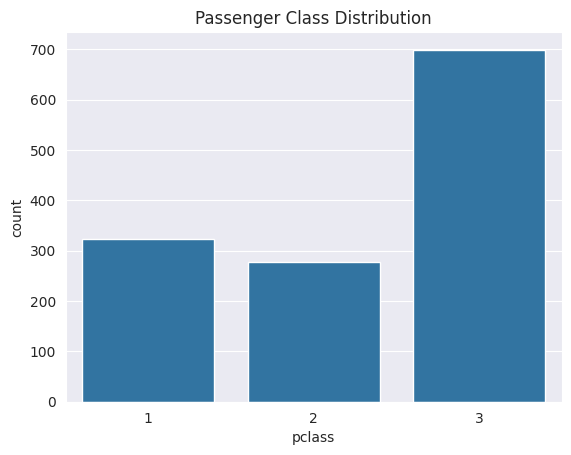

In [ ]:
sns.countplot(x=df["pclass"])
plt.title("Passenger Class Distribution")
plt.show()


**Distribution of Survival**

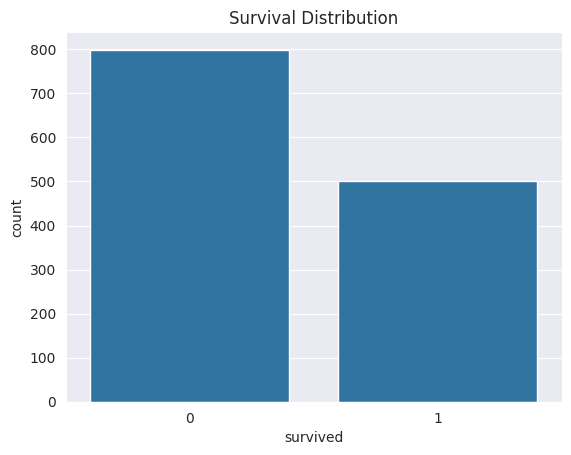

In [ ]:
sns.countplot(x=df["survived"])
plt.title("Survival Distribution")
plt.show()


**Box Plot for Outlier Detection**

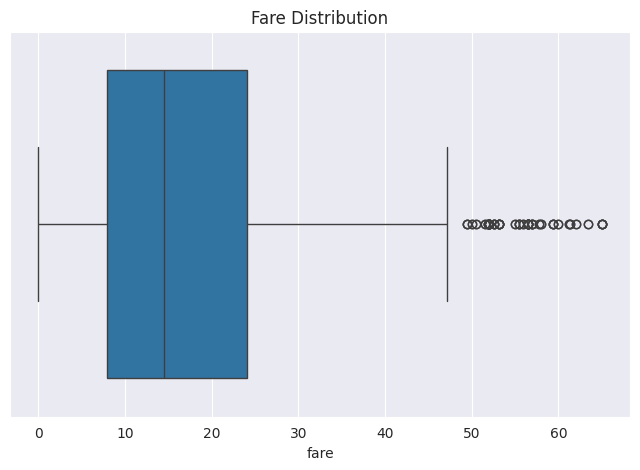

In [ ]:
# Box plot for Fare
plt.figure(figsize=(8,5))
sns.boxplot(x=df["fare"])
plt.title("Fare Distribution")
plt.show()

# **Bivariate Analysis (Two Variable Analysis)**
# **1.Correlation Analysis**

In [ ]:
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Print correlation matrix
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
             pclass  survived       age    family      fare
pclass    1.000000 -0.308952 -0.302447 -0.151506 -0.461024
survived -0.308952  1.000000 -0.008917  0.213701  0.192035
age      -0.302447 -0.008917  1.000000  0.007078  0.100786
family   -0.151506  0.213701  0.007078  1.000000  0.208400
fare     -0.461024  0.192035  0.100786  0.208400  1.000000


# **2.Survival by Gender**

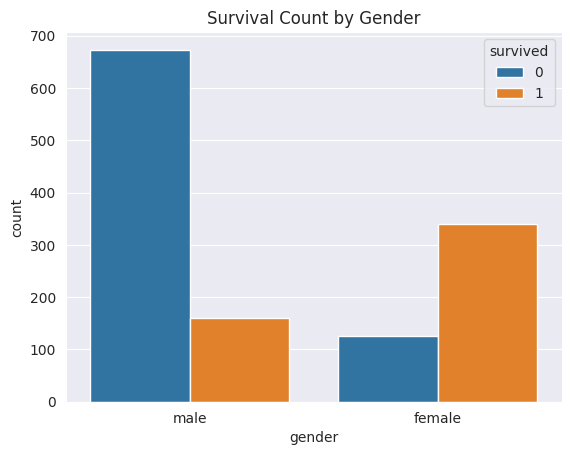

In [ ]:
sns.countplot(x="gender", hue="survived", data=df)
plt.title("Survival Count by Gender")
plt.show()


# **3.Survival Rate by Passenger Class**

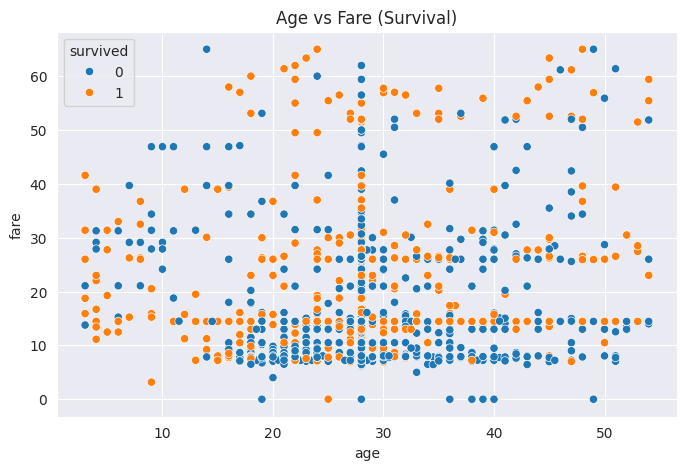

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["age"], y=df["fare"], hue=df["survived"])
plt.title("Age vs Fare (Survival)")
plt.show()

# **4.Box plot of Fare by Pclass**

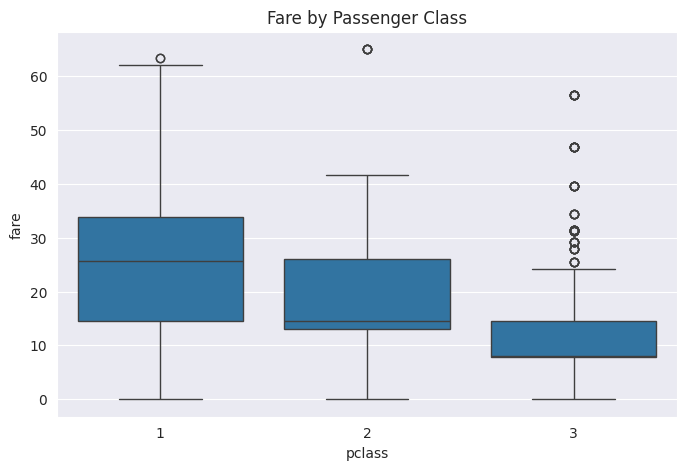

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["pclass"], y=df["fare"])
plt.title("Fare by Passenger Class")
plt.show()

# **1.Pair Plot (Multiple Scatter Plots)**

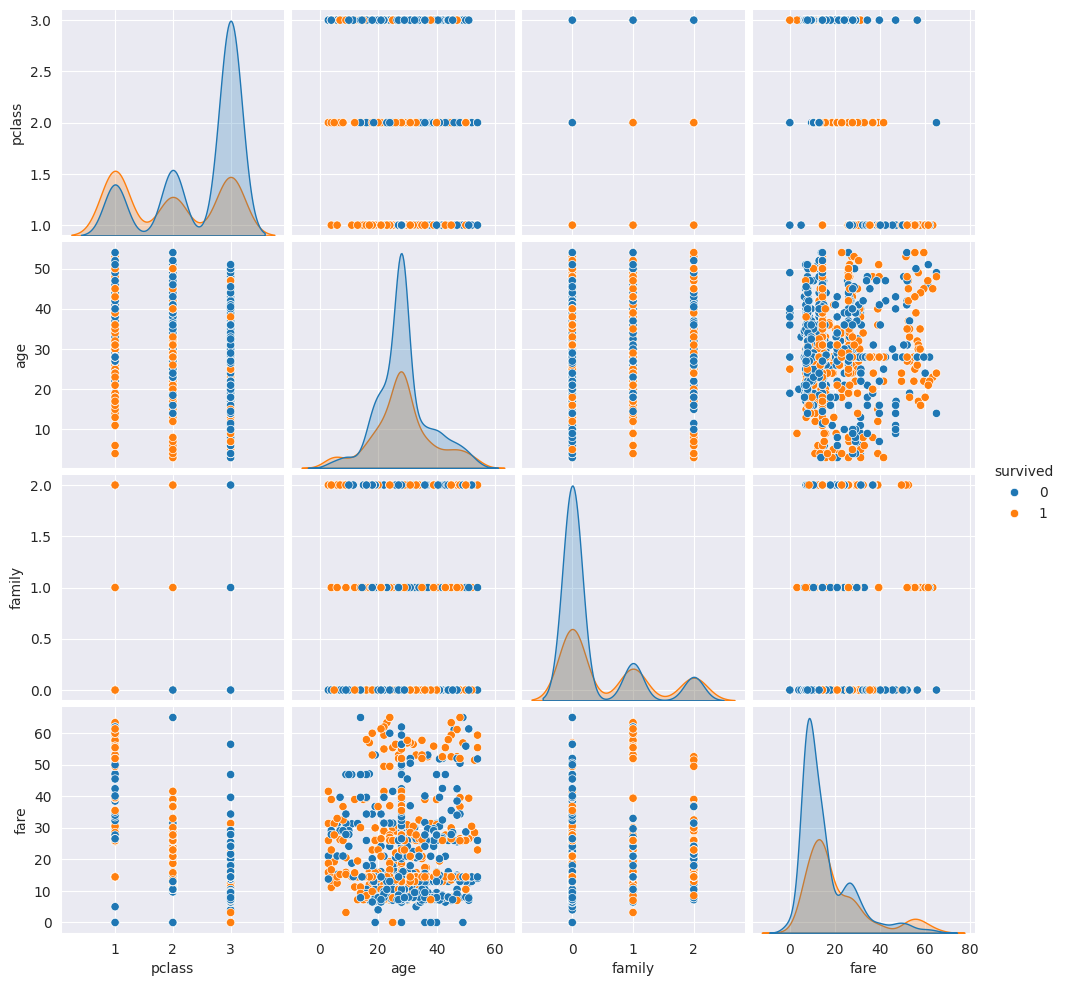

In [ ]:
sns.pairplot(df, hue="survived")
plt.show()

# **2.Heat Map**

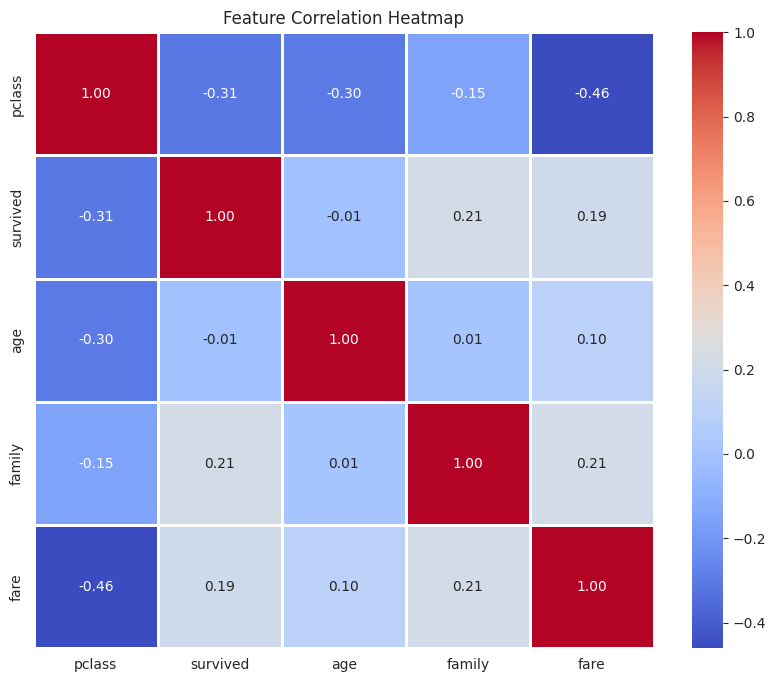

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=1, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# **3.Grouped Comparisons to Identify Combined Effects of Multiple Features**
Grouped comparisons help analyze how multiple features interact and affect an outcome (e.g., survival in the Titanic dataset).
 Below are some useful methods:


*   Survival Rate by Passenger Class and Gender (Grouped Bar Plot)
*   Fare Distribution by Passenger Class and Survival (Violin Plot)
*   Age vs. Survival by Gender (Scatter Plot with Color Encoding)








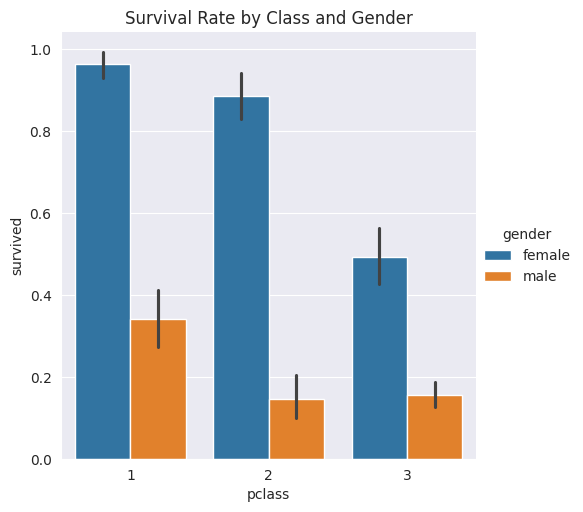

In [ ]:

# Grouped bar plot of survival rate by passenger class and gender
sns.catplot(x="pclass", y="survived", hue="gender", kind="bar", data=df)
plt.title("Survival Rate by Class and Gender")
plt.show()


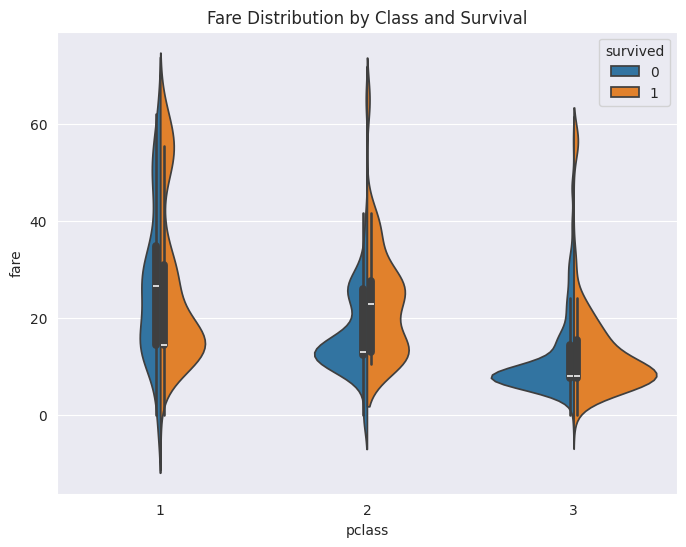

In [ ]:
# Violin plot showing fare distribution across classes and survival
plt.figure(figsize=(8,6))
sns.violinplot(x="pclass", y="fare", hue="survived", data=df, split=True)
plt.title("Fare Distribution by Class and Survival")
plt.show()


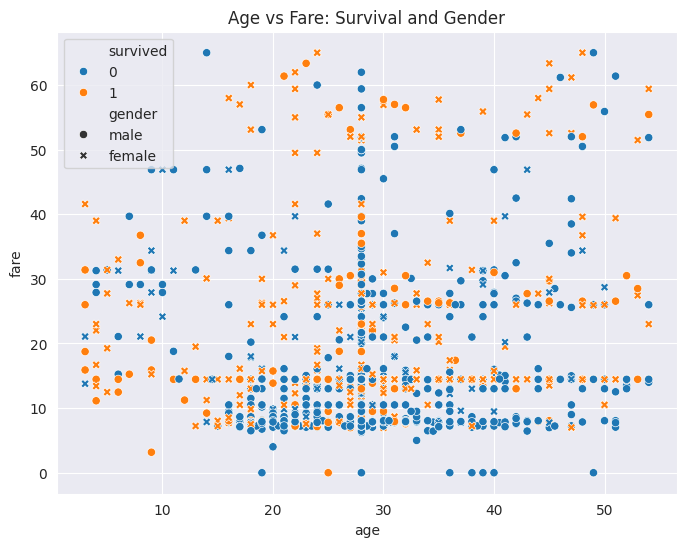

In [ ]:
# Scatter plot for age vs. survival, grouped by gender
plt.figure(figsize=(8,6))
sns.scatterplot(x="age", y="fare", hue="survived", style="gender", data=df)
plt.title("Age vs Fare: Survival and Gender")
plt.show()
